## Heston Model and option Pricing
Try to extend the stock simulation model with stochastic volatility (Heston Model), i.e., replace $\sigma$ in the equation with a stochastic one:
$d S_t = r S_t dt + \sqrt{V_t} S_t dW_t $,  where $ d V_t = (\kappa - \theta V_t) dt + \eta \sqrt{V_t} d B_t$, $d[W_t, B_t] = \rho dt$.  Modify the pricer accordingly and compare the option price with the constant volatility case. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from scipy.stats import norm

In [2]:
def sim_stock_hest(t0,T,S0,V0,N_t,r,kappa,theta, eta, rho, N_sim):
   
    dt = T/N_t
    t = np.linspace(t0,T,N_t+1)
    sdt = np.sqrt(dt)
    
    Z1 = np.random.randn(N_sim, N_t)
    Z2 = np.random.randn(N_sim, N_t)
    Z3 = rho*Z1 + np.sqrt(1-rho**2)*Z2
    
    S = np.zeros((N_sim, N_t+1))
    S[:,0] = S0
    
    V = np.zeros((N_sim, N_t+1))
    V[:,0] = V0

    for i in range(N_t):
        vol = np.sqrt(np.maximum(V[:,i],0))
        S[:,i+1] = S[:,i] + r*S[:,i]*dt + vol*S[:,i]*sdt*Z1[:,i] + 0.5*V[:,i]*S[:,i]*(Z1[:,i]**2 - 1)*dt
        V[:,i+1] = V[:,i] + kappa*(theta - V[:,i])*dt + eta*vol*sdt*Z3[:,i] + 0.25*(eta**2)*(Z3[:,i]**2 - 1)*dt
    return S
                      

In [3]:
SP=sim_stock_hest(t0=0,T=10,S0=100,
                  V0=0.0529,N_t=1000,r=0,kappa=0.04,theta=0.1,eta=0.1,rho=-0.9,
                 N_sim=10000)


In [4]:
def option_price(S,K,r,T):
    return np.mean(np.exp(-r*T)*np.maximum(S-K,0))

In [5]:
S=SP[:,-1]
K=100
r=0
T=10
option_price(S,K,r,T)

25.047261878212662

In [6]:
log_n = [2,3,4,5,6]
n_sim = [int(10**k) for k in log_n] 

In [7]:
options=[]
for n in n_sim:
    SP=sim_stock_hest(t0=0,T=10,S0=100,
                  V0=0.04,N_t=100,r=0,kappa=0.5,theta=0.04,eta=0.1,rho=-0.9,
                 N_sim=n)
    S=SP[:,-1]
    op = option_price(S,K,r,T)
    options.append(op)

In [8]:
options

[18.391476802660257,
 23.104823456925224,
 23.915369188898502,
 23.59204657709282,
 23.766196042884044]

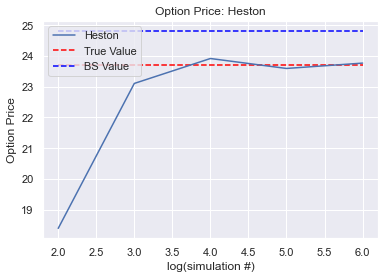

In [9]:
plt.plot(log_n, options,label='Heston')
plt.xlabel('log(simulation #)')
plt.ylabel('Option Price')
plt.title('Option Price: Heston')
plt.hlines(23.69, 2,6, linestyles='dashed', colors='red',label='True Value')
plt.hlines(24.82, 2,6, linestyles='dashed', colors='blue',label='BS Value')
plt.legend()

In [10]:
options

[18.391476802660257,
 23.104823456925224,
 23.915369188898502,
 23.59204657709282,
 23.766196042884044]

In [11]:
def option_price_BS(S0,K,sigma,r,T):
    d1 = (np.log(S0/K) + (r + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [12]:
option_price_BS(100,K,0.2,r,T)

24.817036595415075

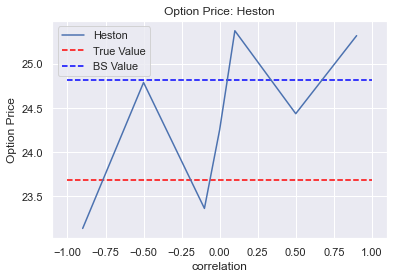

In [13]:
rhos=[-0.9,-0.5,-0.1,0,0.1,0.5,0.9]
options=[]
for corr in rhos:
    SP=sim_stock_hest(t0=0,T=10,S0=100,
                  V0=0.04,N_t=100,r=0,kappa=0.5,theta=0.04,eta=0.1,rho=corr,
                 N_sim=10000)
    S=SP[:,-1]
    op = option_price(S,K,r,T)
    options.append(op)
    
plt.plot(rhos, options,label='Heston')
plt.xlabel('correlation')
plt.ylabel('Option Price')
plt.title('Option Price: Heston')
plt.hlines(23.69, -1,1, linestyles='dashed', colors='red',label='True Value')
plt.hlines(24.82, -1,1, linestyles='dashed', colors='blue',label='BS Value')
plt.legend()

In [14]:
options

[23.137522716094672,
 24.79149600581815,
 23.36418301377849,
 24.255096257418977,
 25.37777082031723,
 24.43785432135447,
 25.32206947569267]

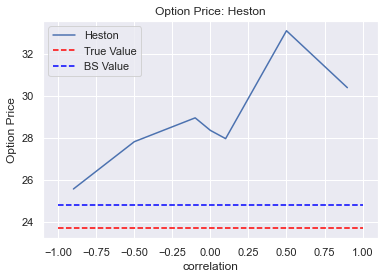

In [15]:
rhos=[-0.9,-0.5,-0.1,0,0.1,0.5,0.9]
options=[]
for corr in rhos:
    SP=sim_stock_hest(t0=0,T=10,S0=100,
                  V0=0.0529,N_t=1000,r=0,kappa=0.04,theta=0.1,eta=0.1,rho=corr,
                 N_sim=10000)
    S=SP[:,-1]
    op = option_price(S,K,r,T)
    options.append(op)
    
plt.plot(rhos, options,label='Heston')
plt.xlabel('correlation')
plt.ylabel('Option Price')
plt.title('Option Price: Heston')
plt.hlines(23.69, -1,1, linestyles='dashed', colors='red',label='True Value')
plt.hlines(24.82, -1,1, linestyles='dashed', colors='blue',label='BS Value')
plt.legend()